In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


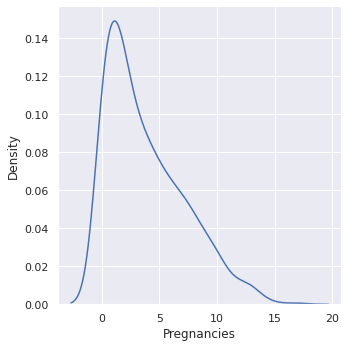

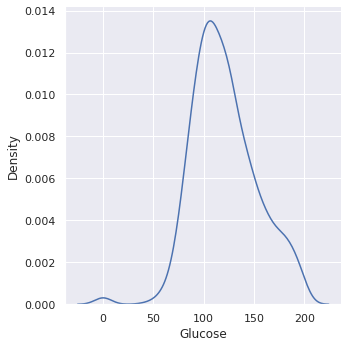

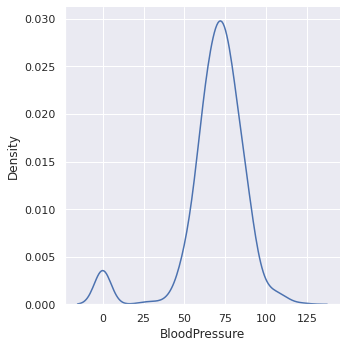

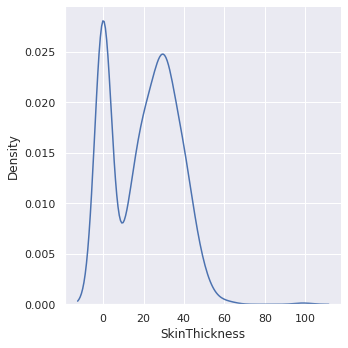

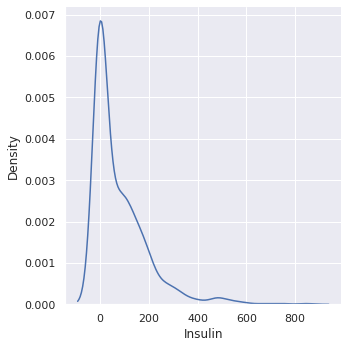

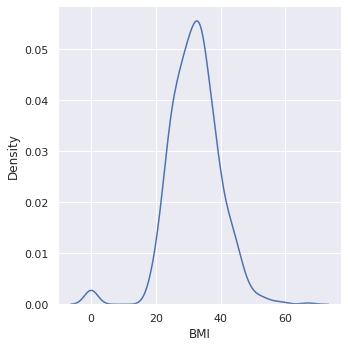

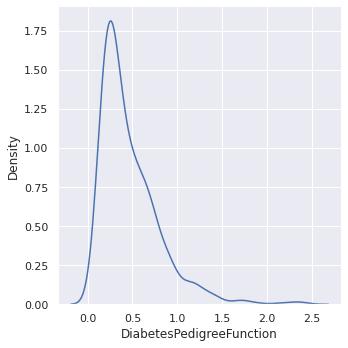

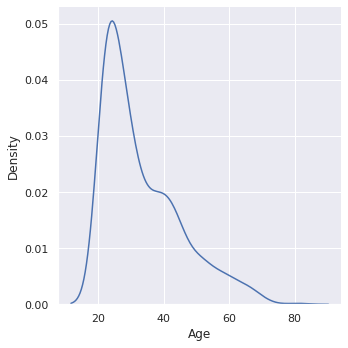

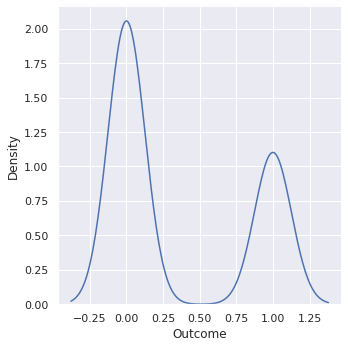

In [14]:
for column in data.columns:
    sns.displot(data=data[column], kind= 'kde')

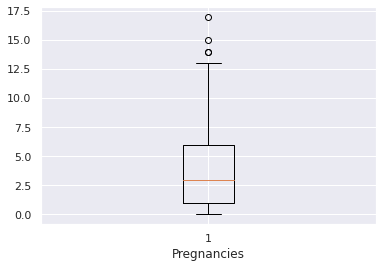

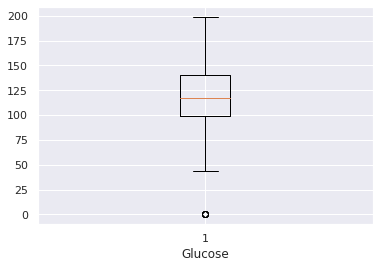

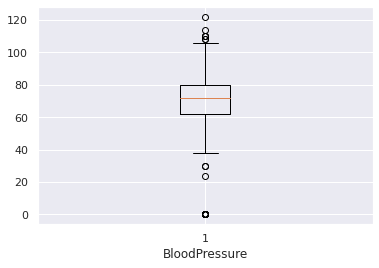

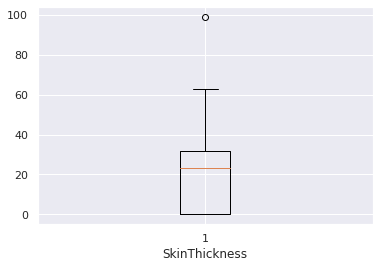

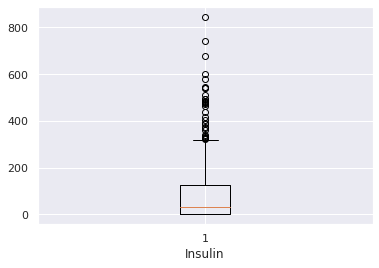

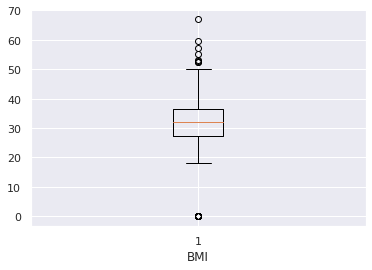

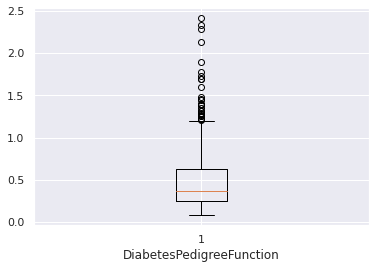

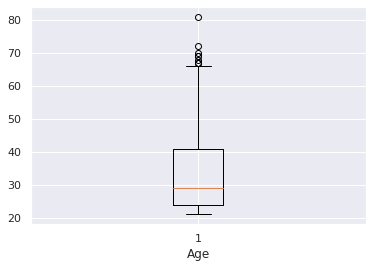

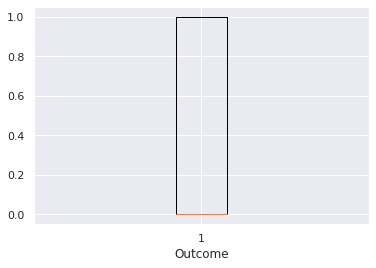

In [22]:
for column in data:
    plt.boxplot(x = data[column])
    plt.xlabel(column)
    plt.show()

In [23]:
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]



In [24]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
q = data_cleaned['SkinThickness'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Age']<q]



In [27]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


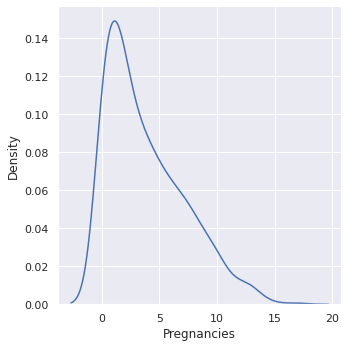

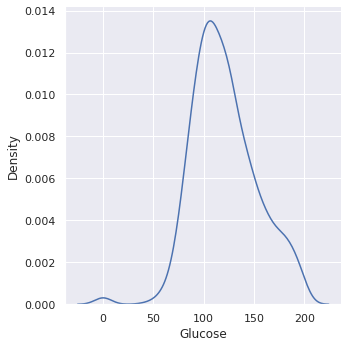

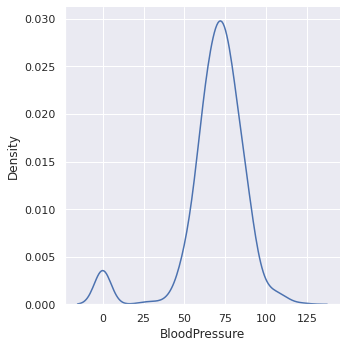

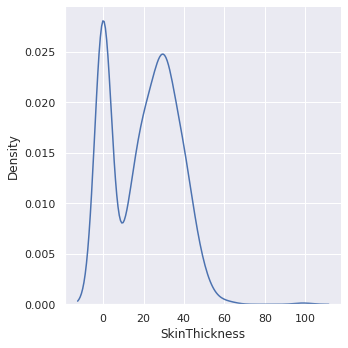

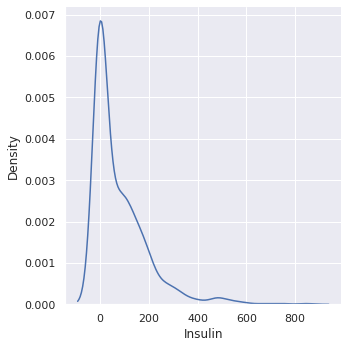

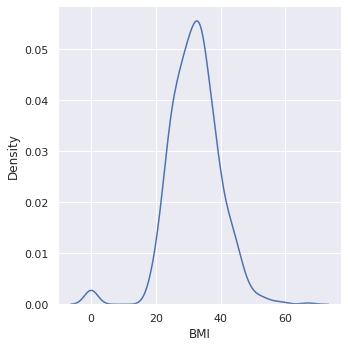

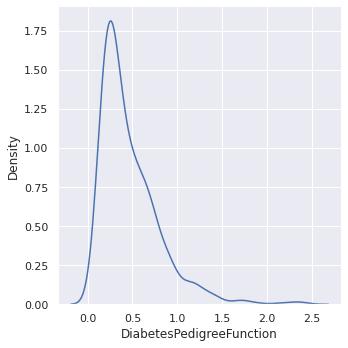

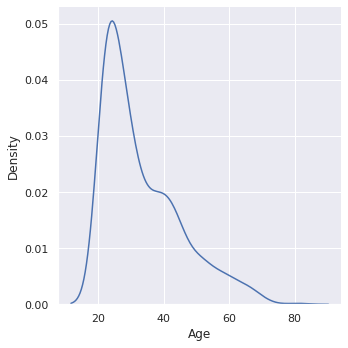

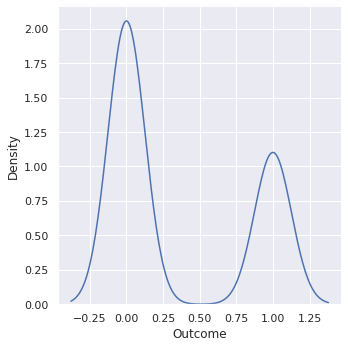

In [29]:
for column in data_cleaned.columns:
    sns.displot(data=data[column], kind= 'kde')

In [30]:
X = data_cleaned.drop(columns= ['Outcome'])
y = data_cleaned['Outcome']

In [31]:
scaler = StandardScaler()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
vif = pd.DataFrame()

In [43]:
vif['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif['features'] = X.columns

In [44]:
vif.sort_values(by = 'vif',ascending= False)

,vif,features
7,1.882319,Age
0,1.706602,Pregnancies
3,1.600862,SkinThickness
4,1.571092,Insulin
5,1.244981,BMI
1,1.228792,Glucose
2,1.200139,BloodPressure
6,1.053086,DiabetesPedigreeFunction


In [45]:
kmean = KNeighborsClassifier()

In [46]:
model = kmean.fit(X_train, y_train)

In [47]:
pred = model.predict(X_test)

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
accuracy_score(pred, y_test)

0.6971153846153846

In [49]:
prediction = model.predict(X_train)

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
accuracy_score(prediction,y_train)

0.8341232227488151

In [51]:
param_grid = {
    'algorithm':['ball_tree','kd_tree', 'brute'],
    'leaf_size':[18,20,23,25,27,29,30],
    'n_neighbors':[3,5,6,9,10,11,12,13]
}

In [52]:
gridsearch = GridSearchCV(model, param_grid, verbose=3)

In [53]:
model = gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.786 total 

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=11;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=3;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=3;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=3;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=6;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=11;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.798 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=12;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=5;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=6;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=11;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.798 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.788 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=6;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=6;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=6;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=6;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=6;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=9;, score=0.

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=10;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=11;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=27, n_neighbors=12

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 4/5] END algorithm=kd_tree, leaf_size=29, n_neighbors=13;, score=0.786 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=29, n_neighbors=13;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=6;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=9;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=0.833 total time=  

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=3;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=3;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=5;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=5;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=5;, score=0.833 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=5;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=5;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=6;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=6;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=6;, score=0.798 total time=   0.0s

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=6;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=6;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=6;, score=0.786 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=0.810 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=0.738 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=0.774 total time=   0

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.821 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.786 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=29, n_neighbors=3;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=29, n_neighbors=3;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=29, n_neighbors=3;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=29, n_neighbors=3;, score=0.726 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=29, n_neighbors=3;, score=0.774 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=29, n_neighbors=5;, score=0.753 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=29, n_neighbors=5;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=29, n_neighbors=5;, score=0.833 total time=   0

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.753 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=0.798 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=0.762 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=0.845 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=0.776 total t

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [54]:
y_pred = model.predict(X_test)

/home/rajan/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
accuracy_score(y_pred,y_test)

0.7211538461538461

In [ ]:
##accuracy is improved